# Insurance Forcast by Using Linear Regression

Data file obtained from: https://github.com/stedy/Machine-Learning-with-R-datasets


This project aims to find the variables that best predict the insurance price in a sample of clients in the United States using linear regressions.


#### Predictor Variables:
1. Age 
2. Gender
3. BMI
4. Number of Children
5. Smoking Status
6. Region



## 1. Preparing Data For Analysis

In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

##### import data into a dataframe:

In [2]:
df = pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Check for null values:

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values are found in the dataframe

##### Check the shape of the dataframe: 

In [4]:
df.shape

(1338, 7)

The dataframe has 1338 rows (with 1 header row) and 7 columns. 

##### Check the datatype of each column: 

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The variables "sex", "smoker", and "region" are categorical variables. The will be encoded as numerical factors. 

##### Converting Categorical Variables to Factors:

In [6]:
from sklearn.preprocessing import LabelEncoder

#Gender
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)

# Smoking Status 
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

#Region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## 2. Test for Multicollinearity

##### Correlations between 'charges' and the six predictor variables:

In [7]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

Only smoking status has a high correlation (r = 0.79) with the insurance charged. 

##### Correlation matrix for all variables:

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,sex,bmi,children,smoker,region,charges
age,1,-0.021,0.11,0.042,-0.025,0.0021,0.3
sex,-0.021,1,0.046,0.017,0.076,0.0046,0.057
bmi,0.11,0.046,1,0.013,0.0038,0.16,0.2
children,0.042,0.017,0.013,1,0.0077,0.017,0.068
smoker,-0.025,0.076,0.0038,0.0077,1,-0.0022,0.79
region,0.0021,0.0046,0.16,0.017,-0.0022,1,-0.0062
charges,0.3,0.057,0.2,0.068,0.79,-0.0062,1


##### Heat Map for the correlation matrix: 

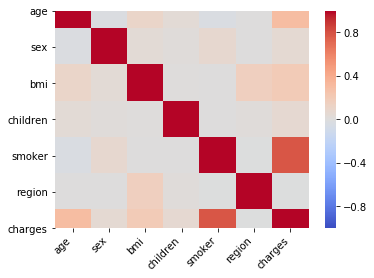

In [9]:

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

No multicollinearity is seen between the variables.

## 3. Data Visualization

### 3.1 Scatter Plots Between Numerical Predictors and Insurance Price

To visualize the data, the predictor variables were plotted against the insurance price ('charges'). 

#### 3.1.1 Age

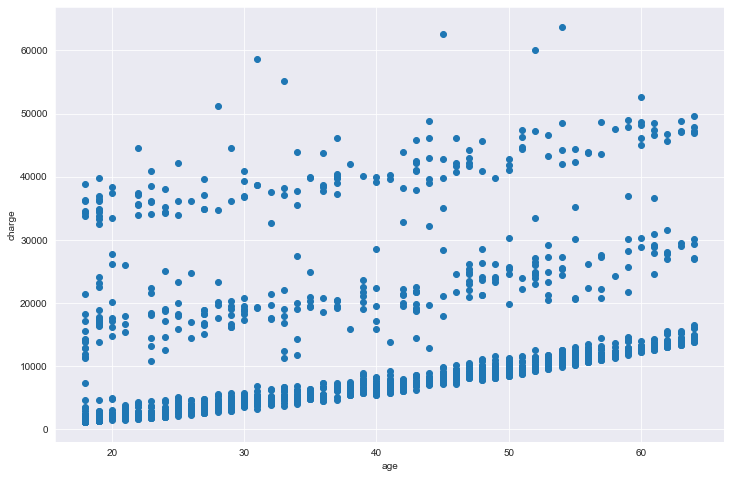

In [75]:
plt.scatter(df['age'],df['charges'])


plt.xlabel('age')
plt.ylabel('charge')

plt.show()

#### 3.1.2 BMI

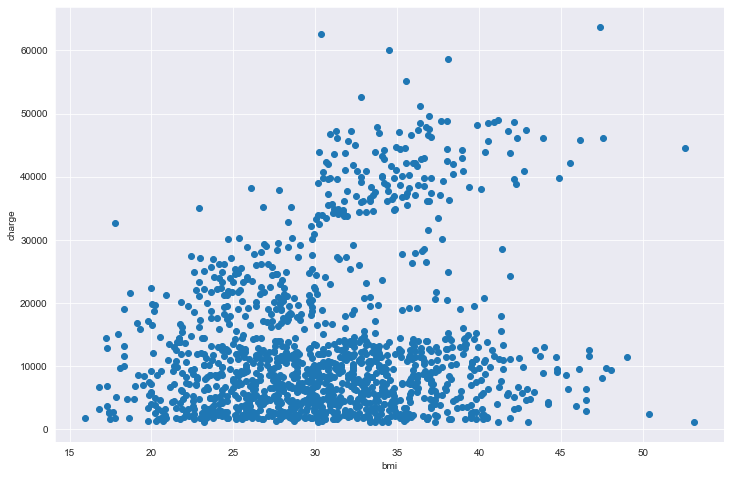

In [77]:
plt.scatter(df['bmi'],df['charges'])


plt.xlabel('bmi')
plt.ylabel('charge')

plt.show()

### 3.2 Histogram for Distribution of Insurance Price

Text(0.5, 1.0, 'Distribution of Insurance Prices')

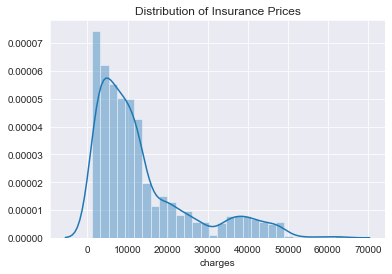

In [68]:

#plt.hist(df['charges'], alpha =.6, density = True, color='darkgreen');

sns.set_style('darkgrid')
sns.distplot(df['charges'])
plt.title("Distribution of Insurance Prices")

The data for insurance prices is skewed to the right, with most of it values between $0 to $10,000. The frequency of the prices decline as the prices increase. 

## 4. Linear Regression 

Since no multicollinearity is seen, all predictor variables will be used in the regression model.

A backwise multivariate linear regression model will be used.

### 4.1 Multiple Linear Regression with All Predictors:  

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm

In [37]:
df1 = pd.read_csv('./insurance.csv')
df1 = pd.get_dummies(df1, prefix=['sex','smoker','region'])


df1.drop('sex_female',axis=1,inplace=True)
df1.drop('smoker_no',axis=1,inplace=True)
df1.drop('region_northeast',axis=1,inplace=True)
df1.head()



,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [50]:


X = df1[['age','sex_male','bmi','children','smoker_yes','region_northwest','region_southeast','region_southwest']]
Y = df1['charges']
 

#model = mlr.fit(X,Y)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())
    


                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              1158.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):                        0.00
Time:                        23:04:27   Log-Likelihood:                         -13618.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1330   BIC:                                  2.729e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

All predictor variables except for 'sex' were signifcant predictors that account for 87.4% of the variance in 'charges'. 

The next step is to take a look at the model after 'sex' is removed. 

### 4.2 Multiple Linear Regression with All Predictors Except For 'Sex': 

In [49]:
X1 = df1[['age','bmi','children','smoker_yes','region_northwest','region_southeast','region_southwest']]
Y1 = df1['charges']
 

#model = mlr.fit(X,Y)
model1 = sm.OLS(Y1, X1)
results1 = model1.fit()
print(results1.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1320.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):                        0.00
Time:                        23:03:22   Log-Likelihood:                         -13619.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1331   BIC:                                  2.729e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

The predictor 'children' is no longer a significant predictor. It will be removed for the subsequent analysis. 

### 4.3 Multiple Linear Regression with All Predictors Except For 'sex' and 'children': 

In [52]:
X2 = df1[['age','bmi','smoker_yes','region_northwest','region_southeast','region_southwest']]
Y2 = df1['charges']
 

#model = mlr.fit(X,Y)
model2 = sm.OLS(Y2, X2)
results2 = model2.fit()
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1536.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):                        0.00
Time:                        23:06:32   Log-Likelihood:                         -13621.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1332   BIC:                                  2.729e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [56]:
mlr = LinearRegression()
model2int = mlr.fit(X2,Y2)
print('intercept:', model2int.intercept_)

intercept: -11601.560408982128


All remaining predictor variables ('age','bmi','smoker', and 'region') are significant predictors that account for 87.4 of the variance in 'charges'. This will be used as the final model. 

## 5. Final Model 

$ charges = 204.46(age) + 66.72(bmi) + 23320.00(smoker) - 1706.50(NW) - 1281.68(SE) - 1923.1789(SW) - 11601.56 $

Insurance price...

- increases with age, BMI, if the client is a smoker
- decreases if the client is in the NW, SE, or SW regions compared to if he or she is in the NE region

This model can be used to predict the insurance price of a potential client using the following predictors: 

1. Age 
2. BMI
3. Smoking Status
4. Region